#### Devi Mahajan
#### 29.1.25
# Week 3 Box Jenkins Models
***

In [562]:
import sklearn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [564]:
data=pd.read_csv('/Users/Devyani/msads/timeseries/hw3/hw3_data.csv')

### 1: 20 pts – Regression Analysis
***

#### A: 4 pts Perform EDA (numerical, visual, descriptive)

In [568]:
data.head()

,date,gdp,urate
0,1/1/1948,265.742,3.4
1,4/1/1948,272.567,3.9
2,7/1/1948,279.196,3.6
3,10/1/1948,280.366,3.7
4,1/1/1949,275.034,4.3


In [570]:
data.count()

date     292
gdp      292
urate    292
dtype: int64

In [572]:
def perform_eda(data):
    print("Missing Data:\n", data.isnull().sum())
    print("\nSummary Statistics:\n", data.describe())
    print("\nCorrelation Matrix:\n", data[['gdp', 'urate']].corr())
    print("\nColumn Names:\n",data.columns.tolist())
    print("\nDescriptive Statistics:\n",data.describe())

In [574]:
perform_eda(data)

Missing Data:
 date     0
gdp      0
urate    0
dtype: int64

Summary Statistics:
                 gdp      urate
count    292.000000  292.00000
mean    6481.725808    5.77911
std     6487.790355    1.74368
min      265.742000    2.60000
25%      802.669250    4.50000
50%     4046.925500    5.60000
75%    11011.904000    6.82500
max    21747.394000   14.80000

Correlation Matrix:
            gdp    urate
gdp    1.00000  0.14432
urate  0.14432  1.00000

Column Names:
 ['date', 'gdp', 'urate']

Descriptive Statistics:
                 gdp      urate
count    292.000000  292.00000
mean    6481.725808    5.77911
std     6487.790355    1.74368
min      265.742000    2.60000
25%      802.669250    4.50000
50%     4046.925500    5.60000
75%    11011.904000    6.82500
max    21747.394000   14.80000


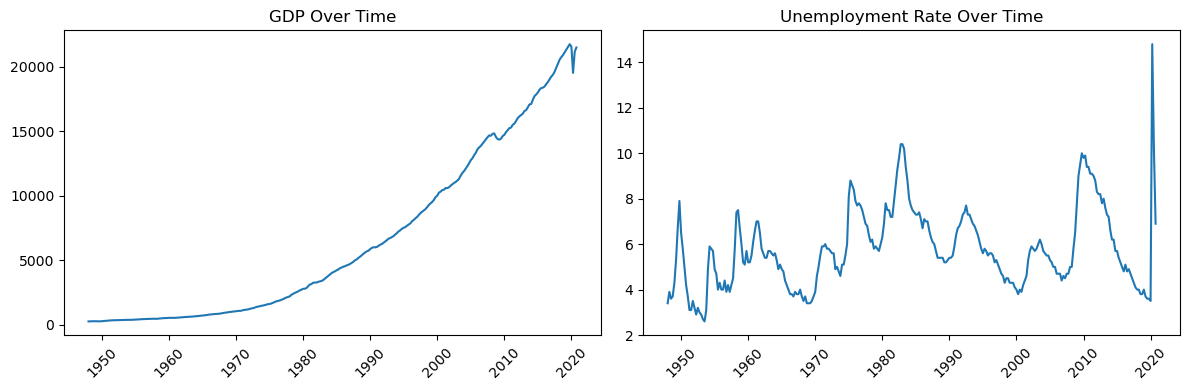

In [576]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(pd.to_datetime(data['date']), data['gdp'])
plt.title('GDP Over Time')
plt.xticks(rotation=45)

plt.subplot(122)
plt.plot(pd.to_datetime(data['date']), data['urate'])
plt.title('Unemployment Rate Over Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

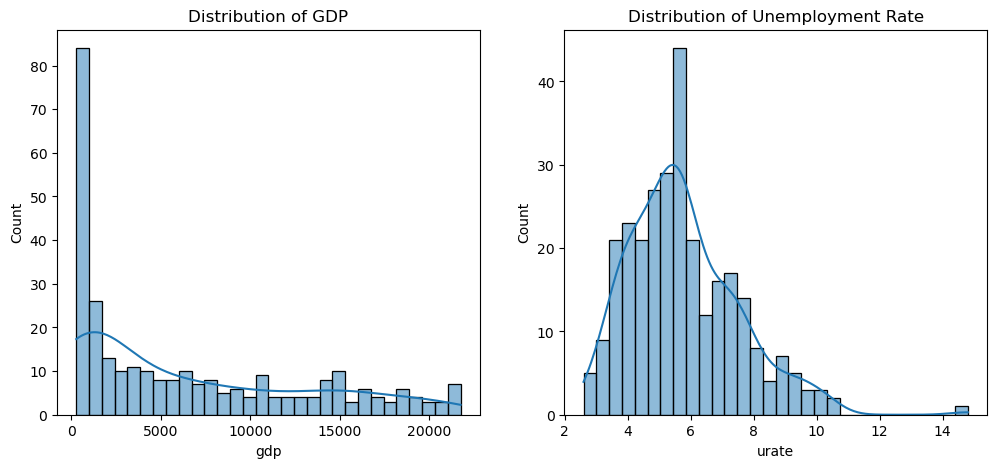

In [578]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['gdp'], bins=30, kde=True)
plt.title("Distribution of GDP")

plt.subplot(1,2,2)
sns.histplot(data['urate'], bins=30, kde=True)
plt.title("Distribution of Unemployment Rate")
plt.show()

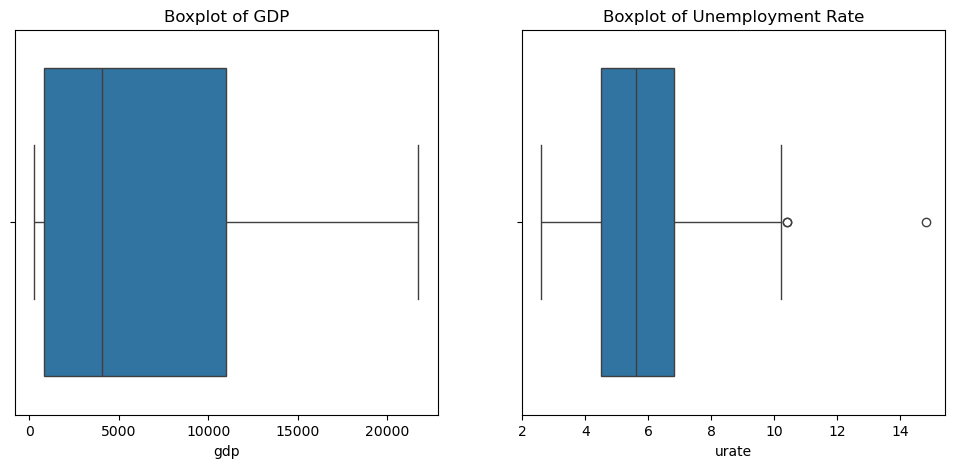

In [579]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=data['gdp'])
plt.title("Boxplot of GDP")

plt.subplot(1,2,2)
sns.boxplot(x=data['urate'])
plt.title("Boxplot of Unemployment Rate")
plt.show()

#### B: 4 pts What is Okun’s Law? Does our dataset fit what we would expect to see? Why or why not?

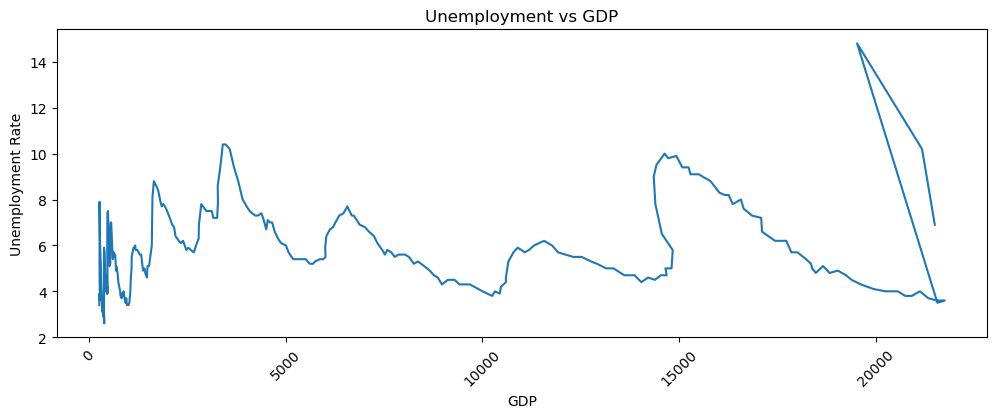

In [583]:
plt.figure(figsize=(12, 4))
plt.plot(data['gdp'], data['urate'])
plt.title('Unemployment vs GDP')
plt.xlabel("GDP")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45)
plt.show()

Okun's law is an economic observation that states that a rise in employment is associated with a rise in GDP. It predicts that a 1% increase in unemployment is usually associated with a 2% drop in GDP. Our dataset does not seem to exactly fit what we would expect to see, as shown in the above graph and in the correlation matrix, where there is a weak positive correlation between GDP and unemployment rate of 0.14432, whereas per Okun's law we would expect to see a strong negative correlation. This could be because of a few reasons: 
- Changes in the structure of the economy since the observation of Okun's law: since Okun's law was stated, technological advances and globalisation may have changed the fundamental structure of the economy, making this empirical law no longer hold
- External factors: macroeconomic conditions such as war, policy changes, and shocks may have caused non-standard GDP and unemployment fluctuations not covered by Okun's law

#### C: 4  pts Create a column that shows GDP change as a percentage and a column that shows UE rate as a change in percentage points. For date 4/1/1948 GDP change = 2.568, UE diff = 0.5


In [587]:
data['gdp_change'] = data['gdp'].pct_change() * 100
data['urate_change'] = data['urate'].diff()
data = data.fillna(0)

In [589]:
data[['gdp', 'gdp_change', 'urate', 'urate_change']].head()

,gdp,gdp_change,urate,urate_change
0,265.742,0.000000,3.4,0.0
1,272.567,2.568281,3.9,0.5
2,279.196,2.432063,3.6,-0.3
3,280.366,0.419060,3.7,0.1
4,275.034,-1.901800,4.3,0.6


#### D: 2 pts Split into Train/test ( ) and create a scatterplot, verifying the negative relationship in Okun’s law.

In [592]:
from sklearn.model_selection import train_test_split
X = data[['urate_change']]
y = data['gdp_change']

In [594]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Length of Train Set: " + str(X_train.shape[0]))
print("Length of Test Set: " + str(y_test.shape[0]))
smape_results = {}

Length of Train Set: 233
Length of Test Set: 59


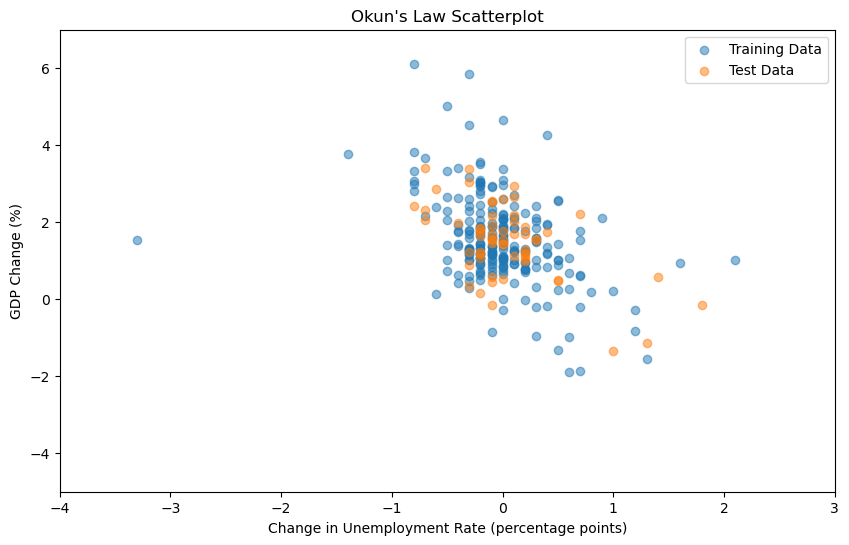

In [596]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.5, label='Test Data')
plt.xlabel('Change in Unemployment Rate (percentage points)')
plt.ylabel('GDP Change (%)')
plt.title("Okun's Law Scatterplot")
plt.xlim(-4, 3)
plt.ylim(-5, 7)
plt.legend()
plt.show()

#### E: 2 pts Fit a linear model on the Training set. State Okun’s law using your data e.g. interpret the coefficients.


In [599]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [601]:
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.3f}")
print(f"Coefficient: {model.coef_[0]:}")
print(f"R-squared: {model.score(X_train, y_train):.3f}")


Model Coefficients:
Intercept: 1.539
Coefficient: -1.0362693010390822
R-squared: 0.454


In [603]:
print(f"Estimated Okun’s Law: GDP Change = {model.intercept_:.2f} + {model.coef_[0]:.2f} * UE Rate Change")

Estimated Okun’s Law: GDP Change = 1.54 + -1.04 * UE Rate Change


Here, the coefficient of the model is -0.9545, showing a strong negative correlation between changes in unemployment rate and GDP. This is consistent with what is predicted by Okun's law, showing that an increase in unemployment is associated with a decrease in GDP. Above, we can see the estimated Okun's law model as fitted on this data.

#### F: 4pts How can we use this model to predict level of GDP dollars in the future? What will we need, what are the resulting limitations?

To predict GDP using this model, we can use our equation as defined in 1E, where we see that: 

GDP Change = 1.52 + -0.95 * UE Rate Change

We can use this to predict on the test set as follows:

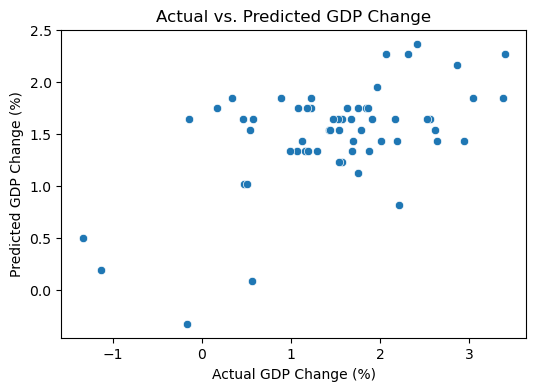

In [610]:
y_pred = model.predict(X_test)
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual GDP Change (%)")
plt.ylabel("Predicted GDP Change (%)")
plt.title("Actual vs. Predicted GDP Change")
plt.show()

We can train the model to refine the coefficients of this equation and thereby fix them for future use. To predict GDP in the future we will also need to forecast unemployment rates, which we could do via time series modelling and incorporating economic projections.

***
### 2: 20 pts – Box Jenkins model for GDP
***

#### A: 4 pts Perform transformations or differencing until you can visually and statistically confirm stationarity on training set. Summarize the changes to your time series.

In [615]:
from statsmodels.tsa.stattools import adfuller

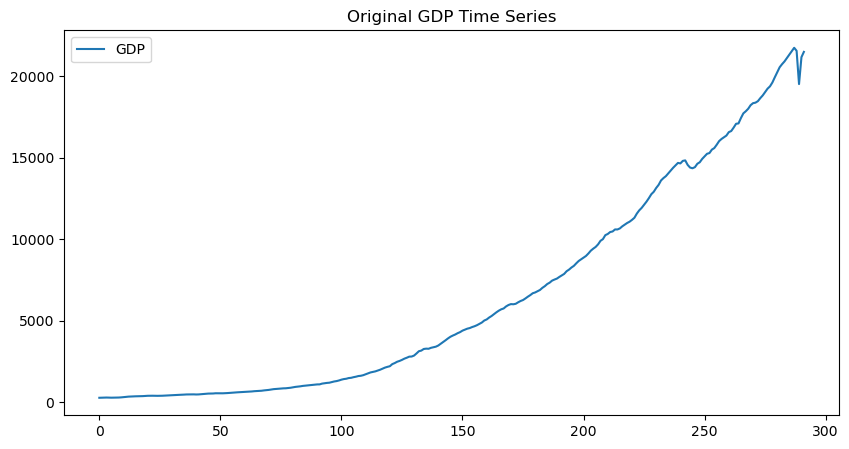

In [617]:
plt.figure(figsize=(10,5))
plt.plot(data['gdp'], label="GDP")
plt.title("Original GDP Time Series")
plt.legend()
plt.show()

In [619]:
#adf test
def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", result[4])
    if result[1] < 0.05:
        print("Stationary (Reject Null Hypothesis)")
    else:
        print("Not Stationary (Fail to Reject Null Hypothesis)")

In [621]:
check_stationarity(data['gdp'])

ADF Statistic: 3.5223
p-value: 1.0000
Critical Values: {'1%': -3.453261605529366, '5%': -2.87162848654246, '10%': -2.5721455328896603}
Not Stationary (Fail to Reject Null Hypothesis)


In [623]:
data['gdp_diff'] = data['gdp'].diff()
data = data.dropna(subset=['gdp_diff'])

In [625]:
check_stationarity(data['gdp_diff'])

ADF Statistic: -4.1934
p-value: 0.0007
Critical Values: {'1%': -3.453342167806272, '5%': -2.871663828287282, '10%': -2.572164381381345}
Stationary (Reject Null Hypothesis)


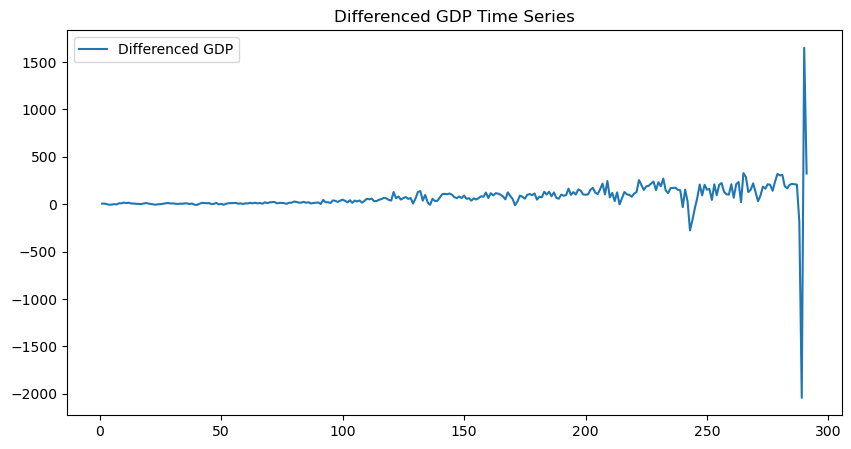

In [627]:
plt.figure(figsize=(10,5))
plt.plot(data['gdp_diff'], label="Differenced GDP")
plt.title("Differenced GDP Time Series")
plt.legend()
plt.show()

The time series initially showed non-stationarity with a high p-value on the ADF test, failing to reject the null hypothesis of non-stationarity. To remove this trend, we differenced the data and reapplied the tests.

#### B: 4 pts Create and interpret ACF and PACF plots


In [631]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

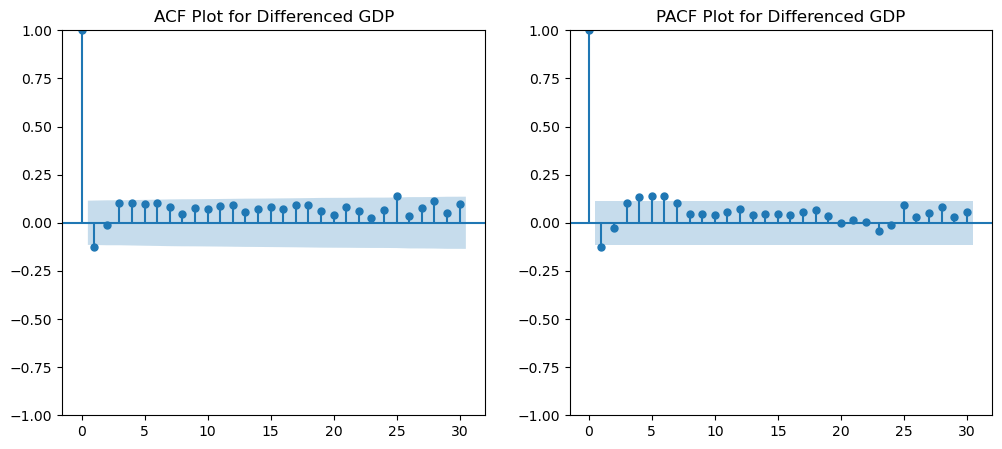

In [633]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(data['gdp_diff'].dropna(), ax=axes[0], lags=30)
axes[0].set_title("ACF Plot for Differenced GDP")
plot_pacf(data['gdp_diff'].dropna(), ax=axes[1], lags=30)
axes[1].set_title("PACF Plot for Differenced GDP")
plt.show()

The ACF shows autocorrelation at various lags after differencing, while the PACF plot shows  partial correlations between the series and lags after controlling for intermediate lags. 

#### C: 4 pts Fit an appropriate Box Jenkins model on training set


In [637]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
p_values = range(0, 3)
d_values = range(0, 2)  # Usually 1 is sufficient
q_values = range(0, 3)

In [639]:
best_aic = float("inf")
best_order = None
best_model = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(data['gdp'], order=(p, d, q))
                result = model.fit()
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, d, q)
                    best_model = result
            except Exception as e:
                continue

print(f"Best ARIMA Order: {best_order}")
print(f"Best AIC: {best_aic:.2f}")

Best ARIMA Order: (1, 1, 2)
Best AIC: 3791.14


In [640]:
p, d, q = 1, 1, 2  
gdp_arima_model = ARIMA(data['gdp'], order=(p, d, q))
gdp_arima_result = gdp_arima_model.fit()
print(gdp_arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                    gdp   No. Observations:                  291
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1891.568
Date:                Wed, 29 Jan 2025   AIC                           3791.137
Time:                        17:50:14   BIC                           3805.816
Sample:                             0   HQIC                          3797.018
                                - 291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9987      0.006    172.742      0.000       0.987       1.010
ma.L1         -1.2739      0.022    -59.141      0.000      -1.316      -1.232
ma.L2          0.3035      0.019     16.110      0.0

#### D: 4 pts Check residuals (scatter plot, histogram, ACF, portmanteau tests) Give a summary of your residuals.

In [642]:
gdp_residuals = gdp_arima_result.resid

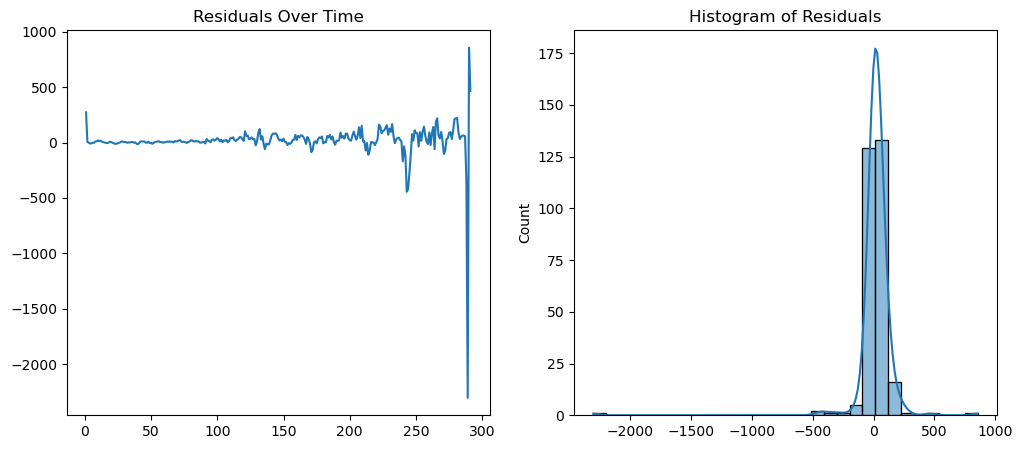

In [645]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(gdp_residuals)
plt.title("Residuals Over Time")

plt.subplot(1,2,2)
sns.histplot(gdp_residuals, bins=30, kde=True)
plt.title("Histogram of Residuals")
plt.show()

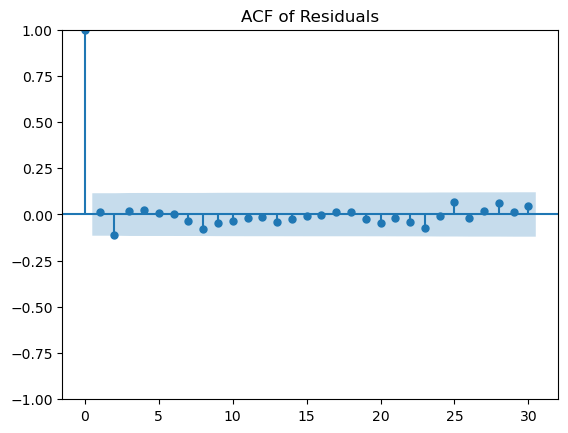

In [648]:
plot_acf(gdp_residuals, lags=30)
plt.title("ACF of Residuals")
plt.show()

In [649]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(gdp_residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_results)

Ljung-Box Test Results:
     lb_stat  lb_pvalue
10  7.203991   0.706057


In [652]:
print("\nResidual Statistics:")
print(f"Mean: {gdp_residuals.mean():.4f}")
print(f"Standard Deviation: {gdp_residuals.std():.4f}")
print(f"Skewness: {gdp_residuals.skew():.4f}")
print(f"Kurtosis: {gdp_residuals.kurtosis():.4f}")


Residual Statistics:
Mean: 18.9912
Standard Deviation: 163.6749
Skewness: -9.5541
Kurtosis: 143.2086


#### E: 4 pts Print model evaluation metrics MAE, MSE, MAPE, sMAPE on test set


In [655]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [657]:
train_size = int(len(data) * 0.8)
gdp_train, gdp_test = data.iloc[:train_size], data.iloc[train_size:]
gdp_forecast = gdp_arima_result.forecast(steps=len(gdp_test))

In [659]:
mae = mean_absolute_error(gdp_test['gdp'], gdp_forecast)
mse = mean_squared_error(gdp_test['gdp'], gdp_forecast)
mape = (abs(gdp_test['gdp'] - gdp_forecast) / abs(gdp_test['gdp'])).mean() * 100
smape = (2 * abs(gdp_test['gdp'] - gdp_forecast) / (abs(gdp_test['gdp']) + abs(gdp_forecast))).mean() * 100

In [661]:
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"sMAPE: {smape:.2f}%")

MAE: 7949.2155
MSE: 63548137.1583
MAPE: 0.05%
sMAPE: 0.05%


***
### 3: 20 pts – Box Jenkins model for Unemployment rate
***

#### A: 4 pts Perform transformations or differencing until you can visually and statistically prove stationarity on training set. Summarize the changes to your time series.

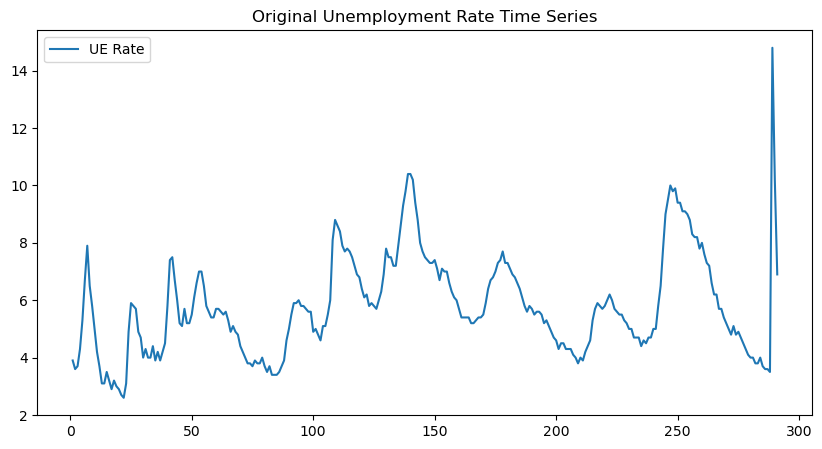

In [665]:
plt.figure(figsize=(10,5))
plt.plot(data['urate'], label="UE Rate")
plt.title("Original Unemployment Rate Time Series")
plt.legend()
plt.show()

In [667]:
check_stationarity(data['urate'])

ADF Statistic: -4.3448
p-value: 0.0004
Critical Values: {'1%': -3.453102162983312, '5%': -2.871558538275452, '10%': -2.5721082282996433}
Stationary (Reject Null Hypothesis)


In [669]:
data['urate_diff'] = data['urate'].diff()

In [671]:
data = data.dropna(subset=['urate_diff'])

In [673]:
check_stationarity(data['urate_diff'])

ADF Statistic: -12.9742
p-value: 0.0000
Critical Values: {'1%': -3.453261605529366, '5%': -2.87162848654246, '10%': -2.5721455328896603}
Stationary (Reject Null Hypothesis)


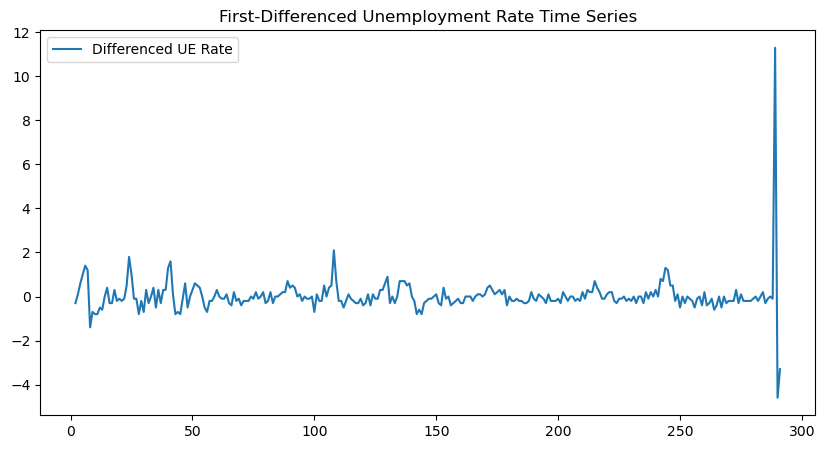

In [675]:
plt.figure(figsize=(10,5))
plt.plot(data['urate_diff'], label="Differenced UE Rate")
plt.title("First-Differenced Unemployment Rate Time Series")
plt.legend()
plt.show()

The data was initially stationary, and was differenced to lower the p-value.

#### B: 4 pts Create and interpret ACF and PACF plots

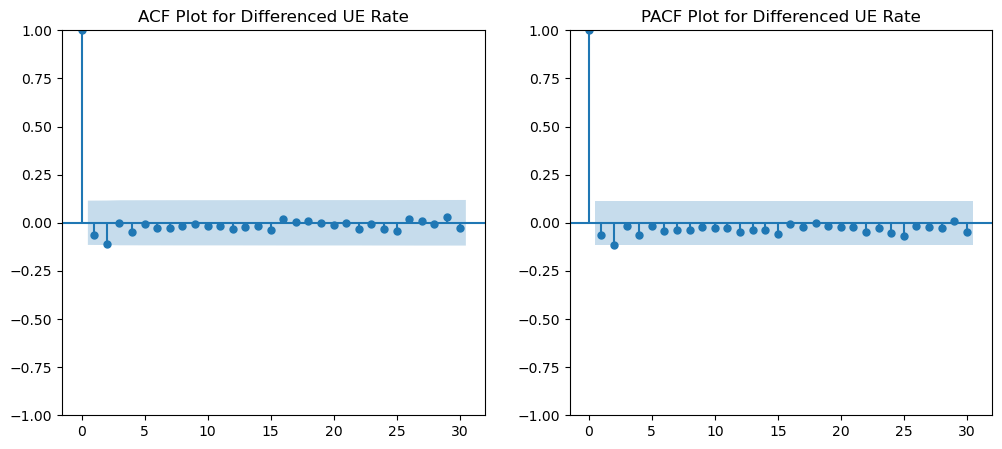

In [679]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(data['urate_diff'], ax=axes[0], lags=30)
axes[0].set_title("ACF Plot for Differenced UE Rate")
plot_pacf(data['urate_diff'], ax=axes[1], lags=30)
axes[1].set_title("PACF Plot for Differenced UE Rate")
plt.show()

The autocorrelation at lag 1 in the ACF plot is significant, but all other lags fall within the confidence interval, suggesting that beyond the lag the series behaves like white noise. In the PACF plot, higher lags do not show significant partial autocorrelation, indicating no higher-order autoregressive terms are needed.

#### C: 4 pts Fit an appropriate Box Jenkins model on training set

In [683]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
warnings.filterwarnings("ignore")

p = range(0, 3)  
d = [1]          
q = range(0, 3) 
param_grid = list(product(p, d, q))

best_aic = float("inf")
best_params = None
best_model = None

for params in param_grid:
    try:
        model = ARIMA(data['urate'], order=params)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_params = params
            best_model = result
    except:
        continue

print(f"Best ARIMA Parameters: {best_params}")
print(f"Best AIC: {best_aic:.2f}")

if best_model:
    print(best_model.summary())

Best ARIMA Parameters: (1, 1, 1)
Best AIC: 721.29
                               SARIMAX Results                                
Dep. Variable:                  urate   No. Observations:                  290
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -357.646
Date:                Wed, 29 Jan 2025   AIC                            721.292
Time:                        17:50:18   BIC                            732.292
Sample:                             0   HQIC                           725.700
                                - 290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8787      0.053     16.677      0.000       0.775       0.982
ma.L1         -0.9910      0.041    -24.166      0.000      -1.071      -0.911
si

In [685]:
p, d, q = 1, 1, 1
urate_arima_model = ARIMA(data['urate'], order=(p, d, q))
urate_arima_result = urate_arima_model.fit()
print(urate_arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  urate   No. Observations:                  290
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -357.646
Date:                Wed, 29 Jan 2025   AIC                            721.292
Time:                        17:50:18   BIC                            732.292
Sample:                             0   HQIC                           725.700
                                - 290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8787      0.053     16.677      0.000       0.775       0.982
ma.L1         -0.9910      0.041    -24.166      0.000      -1.071      -0.911
sigma2         0.6923      0.013     52.294      0.0

#### D: 4 pts Check residuals (scatter plot, histogram, ACF, portmanteau tests)  Give a summary of your residuals.


In [688]:
residuals_urate = urate_arima_result.resid

In [690]:
ljung_box_results_urate = acorr_ljungbox(residuals_urate, lags=[10], return_df=True)
print("Ljung-Box Test Results (UE Rate):")
print(ljung_box_results_urate)

Ljung-Box Test Results (UE Rate):
     lb_stat  lb_pvalue
10  2.535681   0.990345


In [692]:
print("\nResidual Statistics (UE Rate):")
print(f"Mean: {residuals_urate.mean():.4f}")
print(f"Standard Deviation: {residuals_urate.std():.4f}")
print(f"Skewness: {residuals_urate.skew():.4f}")
print(f"Kurtosis: {residuals_urate.kurtosis():.4f}")


Residual Statistics (UE Rate):
Mean: 0.0772
Standard Deviation: 0.8564
Skewness: 7.3183
Kurtosis: 94.8748


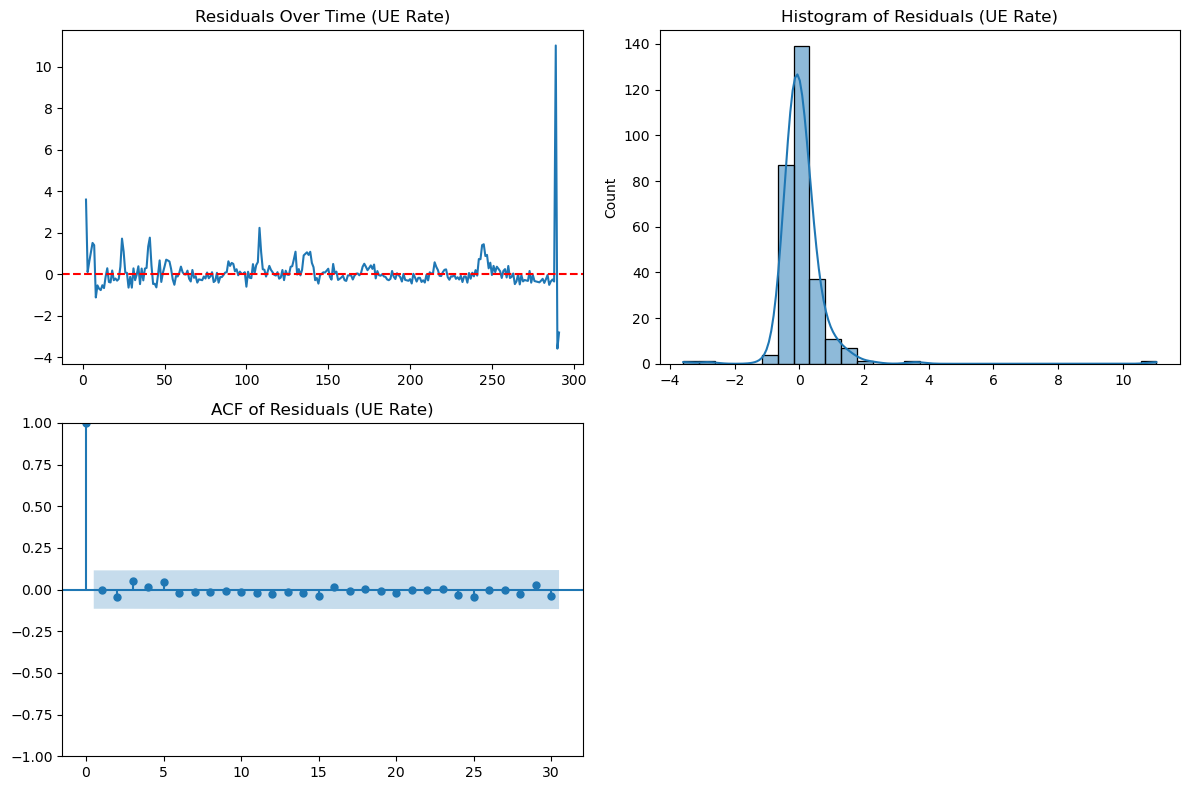

In [694]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(residuals_urate)
plt.title("Residuals Over Time (UE Rate)")
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(2, 2, 2)
sns.histplot(residuals_urate, bins=30, kde=True)
plt.title("Histogram of Residuals (UE Rate)")

plt.subplot(2, 2, 3)
plot_acf(residuals_urate, lags=30, ax=plt.gca())
plt.title("ACF of Residuals (UE Rate)")

plt.tight_layout()
plt.show()

#### E: 4 pts Print model evaluation metrics MAE, MSE, MAPE, sMAPE on test set

In [696]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [697]:
forecast_urate = urate_arima_result.forecast(steps=len(test))

In [698]:
mae_urate = mean_absolute_error(test['urate'], forecast_urate)
mse_urate = mean_squared_error(test['urate'], forecast_urate)
mape_urate = (abs(test['urate'] - forecast_urate) / abs(test['urate'])).mean() * 100
smape_urate = (2 * abs(test['urate'] - forecast_urate) / (abs(test['urate']) + abs(forecast_urate))).mean() * 100

In [703]:
print(f"MAE (UE Rate): {mae_urate:.4f}")
print(f"MSE (UE Rate): {mse_urate:.4f}")
print(f"MAPE (UE Rate): {mape_urate:.2f}%")
print(f"sMAPE (UE Rate): {smape_urate:.2f}%")

MAE (UE Rate): 1.9972
MSE (UE Rate): 5.7481
MAPE (UE Rate): 18.16%
sMAPE (UE Rate): 21.53%


***
### 4: 40 pts – Evaluation
***

#### A: 10 pts Compare the two models’ performance using the error metrics as evidence

In [707]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [709]:
def evaluate_model(true_values, predictions):
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    mape = (abs(true_values - predictions) / abs(true_values)).mean() * 100
    smape = (2 * abs(true_values - predictions) / (abs(true_values) + abs(predictions))).mean() * 100
    return mae, mse, mape, smape

In [711]:
train_size = int(len(data['gdp']) * 0.8)
gdp_train, gdp_test = data['gdp'][:train_size], data['gdp'][train_size:]
train_size = int(len(data['urate']) * 0.8)
urate_train, urate_test = data['urate'][:train_size], data['urate'][train_size:]

In [713]:
if not hasattr(gdp_arima_result, 'fittedvalues'):
    gdp_arima_result = gdp_arima_model.fit()

In [715]:
if not hasattr(urate_arima_result, 'fittedvalues'):
    urate_arima_result = arima_model_urate.fit()

In [717]:
gdp_forecast = gdp_arima_result.get_forecast(steps=len(gdp_test)).predicted_mean
urate_forecast = urate_arima_result.get_forecast(steps=len(urate_test)).predicted_mean

In [719]:
gdp_mae, gdp_mse, gdp_mape, gdp_smape = evaluate_model(gdp_test, gdp_forecast)

In [721]:
urate_mae, urate_mse, urate_mape, urate_smape = evaluate_model(urate_test, urate_forecast)

In [723]:
print("GDP Model Metrics:")
print(f"MAE: {gdp_mae:.4f}, MSE: {gdp_mse:.4f}, MAPE: {gdp_mape:.2f}%, sMAPE: {gdp_smape:.2f}%")

GDP Model Metrics:
MAE: 7826.0898, MSE: 61609489.3611, MAPE: 0.05%, sMAPE: 0.05%


In [725]:
print("Unemployment Rate Model Metrics:")
print(f"MAE: {urate_mae:.4f}, MSE: {urate_mse:.4f}, MAPE: {urate_mape:.2f}%, sMAPE: {urate_smape:.2f}%")

Unemployment Rate Model Metrics:
MAE: 1.9972, MSE: 5.7481, MAPE: 18.16%, sMAPE: 21.53%


The GDP model is much more accurate than the unemployment model. We know this as the MAE is nuch higher and the MAPE and SMAPE values are much lower.

#### B: 10 pts Based on each of the four error metrics' potential for bias, rank them in order of preference, explain why.

1. **sMAPE**  - Best for time series data because it avoids division by 0
2. **MAPE**  - Useful but has issues when actual values are near 0
3. **MSE**  - Sensitive to outliers because it penalizes large deviations more
4. **MAE**  - Simple to interpret but does not penalize large errors heavily enough

#### C: 10 pts What is the rationale for using this model on these time series? Please provide an anecdotal example on why this would be an appropriate model.

We use ARIMA on this data because it captures patterns from past data, removes non-stationarity, accounts for past errors, and, assuming stability, works well for short-term forecasting. This could be appropriate for forecasting unemployment in particular for short-term workforce planning and hiring, as well as for implementing social welfare programs in times of increasing unemployment.

#### D: 10 pts Explain how both the publication and revisions of these economic numbers might affect model performance in production.

Economic data is frequently revised as market conditions change. As our models are trained on preliminary data, model performance would be affected by bias in training data, where it would not generalise well and may not respond to or align with revisions. Moreover, unexpected economic interventions and policy changes may invalidate prior trends, making the models unsuccessful. GDP data is often published in stages, and if a model is trained on a prior stage of GDP data, it may be invalid for future stages of data as market conditions change and macroeconomic factors come into play.